Classification Images using CNN


**IMPORT LIBRARY FOR THIS PROGRAM**

In [ ]:
#import important library for this program
%matplotlib inline
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from google.colab import files
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import time 
import seaborn as sns

**Preparing Dataset (Dataset from Dicoding)**

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-29 17:18:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.36MB/s    in 5m 45s  

2021-05-29 17:23:47 (913 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#extracting zip file 
file_directory = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(file_directory,'r')
zip_ref.extractall('/tmp')
zip_ref.close()


#SaveFolder to categorize Rock Paper and Scissors
base_dir = '/tmp/rockpaperscissors'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir,'scissors')

In [ ]:
#check sum of images 
print('Total rock images : ',len(os.listdir(rock_dir)))
print('Total paper images : ',len(os.listdir(paper_dir)))
print('Total scissors images : ',len(os.listdir(scissors_dir)))

Total rock images :  726
Total paper images :  712
Total scissors images :  750


**Create Image Data Generator for Data Training and Data Testing**

In [ ]:
#Create Image Data Generator for Preprocessing Data and Split Data for Training and Validation
training_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4
                    )

**Using Image Data Generator **

In [ ]:
directory = '/tmp/rockpaperscissors/rps-cv-images/'
dt_train_generator = training_datagen.flow_from_directory(
        directory,  
        target_size=(150, 150),
        class_mode='categorical',
        shuffle=True,
        subset='training'
        )
 
dt_validation_generator = training_datagen.flow_from_directory(
        directory,  
        target_size=(150, 150),
        class_mode='categorical',
        shuffle=True,
        subset='validation'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Create CNN Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

**Compile Model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

**Train CNN Model**

In [ ]:
start_time = time.time()
train_model = model.fit(
      dt_train_generator,
      steps_per_epoch=10,
      epochs=45,
      validation_data=dt_validation_generator,
      validation_steps=4,
      verbose=2)
end_time = time.time()
execution = end_time - start_time

Epoch 1/45
10/10 - 10s - loss: 1.1093 - accuracy: 0.3517 - val_loss: 1.1035 - val_accuracy: 0.3125
Epoch 2/45
10/10 - 9s - loss: 1.1013 - accuracy: 0.3621 - val_loss: 1.1190 - val_accuracy: 0.3203
Epoch 3/45
10/10 - 9s - loss: 1.0996 - accuracy: 0.3448 - val_loss: 1.0953 - val_accuracy: 0.3594
Epoch 4/45
10/10 - 9s - loss: 1.0941 - accuracy: 0.3375 - val_loss: 1.0857 - val_accuracy: 0.3984
Epoch 5/45
10/10 - 9s - loss: 1.0791 - accuracy: 0.4187 - val_loss: 1.0475 - val_accuracy: 0.5156
Epoch 6/45
10/10 - 9s - loss: 1.0580 - accuracy: 0.4241 - val_loss: 1.0086 - val_accuracy: 0.4141
Epoch 7/45
10/10 - 9s - loss: 1.0158 - accuracy: 0.4375 - val_loss: 1.0507 - val_accuracy: 0.3438
Epoch 8/45
10/10 - 9s - loss: 1.0061 - accuracy: 0.4563 - val_loss: 0.9710 - val_accuracy: 0.5156
Epoch 9/45
10/10 - 9s - loss: 1.0168 - accuracy: 0.4750 - val_loss: 0.9852 - val_accuracy: 0.4688
Epoch 10/45
10/10 - 9s - loss: 1.0342 - accuracy: 0.4688 - val_loss: 0.9880 - val_accuracy: 0.4922
Epoch 11/45
10/10 

**Show Execution time of Train CNN Model**

In [ ]:
print('Waktu Pelatihan model :' ,execution ,'second')

Waktu Pelatihan model : 446.4264736175537 second


**Plot Visualisation Accuracy and Loss from the Model**

In [ ]:
akurasi = train_model.history['accuracy']
validasi_akurasi = train_model.history['val_accuracy']
loss = train_model.history['loss']
validasi_loss = train_model.history['val_loss']

Text(0, 0.5, 'Nilai Akurasi')

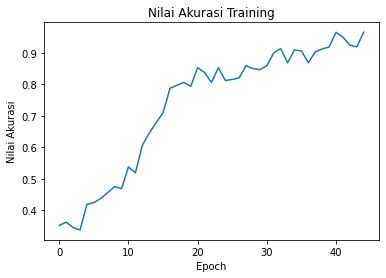

In [ ]:
plt.title('Nilai Akurasi Training')
sns.lineplot(data=akurasi)
plt.xlabel('Epoch')
plt.ylabel('Nilai Akurasi')

Text(0, 0.5, 'Nilai Akurasi')

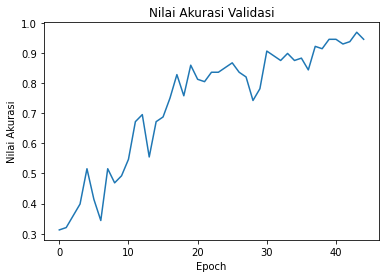

In [ ]:
plt.title('Nilai Akurasi Validasi')
sns.lineplot(data=validasi_akurasi)
plt.xlabel('Epoch')
plt.ylabel('Nilai Akurasi')

Text(0, 0.5, 'Nilai Loss')

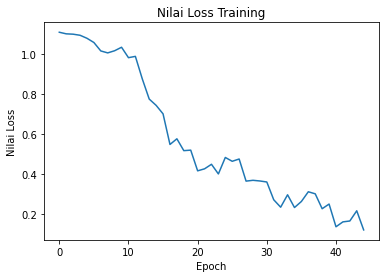

In [ ]:
plt.title('Nilai Loss Training')
sns.lineplot(data=loss)
plt.xlabel('Epoch')
plt.ylabel('Nilai Loss')

Text(0, 0.5, 'Nilai Loss')

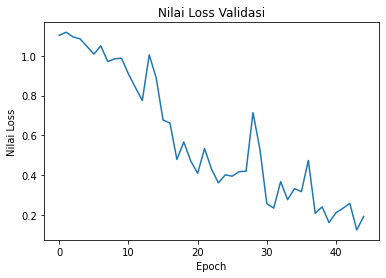

In [ ]:
plt.title('Nilai Loss Validasi')
sns.lineplot(data=validasi_loss)
plt.xlabel('Epoch')
plt.ylabel('Nilai Loss')

**Upload File to Predict the Category Image**

Saving 2DEYFsJ27UgVqv3W.png to 2DEYFsJ27UgVqv3W.png
2DEYFsJ27UgVqv3W.png
Gambar ini merupakan Tangan bentuk Gunting


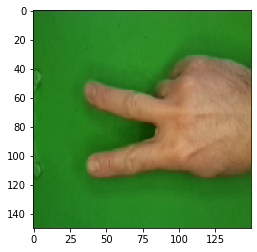

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path,target_size=(150,150))
  imgplot = plt.imshow(img)
  n = image.img_to_array(img)
  n = np.expand_dims(n, axis=0)

  images = np.vstack([n])
  image_class = model.predict(images, batch_size=10)
  print(fn)
  if (image_class[0][0] == 1):
    print('Gambar ini merupakan Tangan bentuk Kertas')
  elif(image_class[0][1] == 1):
    print('Gambar ini merupakan Tangan bentuk Batu')
  elif(image_class[0][2] == 1):
    print('Gambar ini merupakan Tangan bentuk Gunting')
  else:
    print('Tidak Terdefinisi')